In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error
from scipy.stats import zscore
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [4]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import StratifiedKFold,KFold

In [5]:
train=pd.read_csv('train_video.csv')
test=pd.read_csv('test_video.csv')
submit=pd.read_csv('sub_video.csv')

In [6]:
train.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [7]:
test.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views
0,89198,7986,12,42,14,Male,Student,180,138
1,89199,11278,34,115,14,Male,Student,230,840
2,89200,17245,8,110,44,Female,Working Professional,280,628
3,89201,9851,16,137,18,Male,Student,270,462
4,89202,16008,34,96,47,Female,Other,230,840


In [8]:
train.shape,test.shape

((89197, 10), (11121, 9))

In [9]:
ID_col,Target_col='row_id','engagement_score'

In [10]:
train.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [11]:
features=[c for c in train.columns if c not in[ID_col,Target_col] ]

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89197 entries, 0 to 89196
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_id            89197 non-null  int64  
 1   user_id           89197 non-null  int64  
 2   category_id       89197 non-null  int64  
 3   video_id          89197 non-null  int64  
 4   age               89197 non-null  int64  
 5   gender            89197 non-null  object 
 6   profession        89197 non-null  object 
 7   followers         89197 non-null  int64  
 8   views             89197 non-null  int64  
 9   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 6.8+ MB


In [13]:
#checking unique values in each column
for col in train:
     print(f'{col}:{train[col].unique()}')


row_id:[    1     2     3 ... 89195 89196 89197]
user_id:[19990  5304  1840 ... 27378 24273 11279]
category_id:[37 32 12 23 25  7  8  3  5 28 20 36 24 30 31  4  1 21 10 16 11 19 39 15
 43 26 34 13 42 18 44 45 29 27  9 17 40 14 38  6 35 41 46 22 33  2 47]
video_id:[128 132  24 112 139  14 100   4 161  88  75  72  48 107 103  60  74  83
  87  16 151  99  15 102 129 119  13  51  38  35  22  76  45 116 109 146
   1  67  32  53 148 140  63 115 108 113  92  33 117 114  50  17   6 120
  49  20 136  86  58 165  59  97  46  62 104  26  71  29 123 167 163 125
 145  81  65 162  18  77  36  25   9 124  98  31  94  10  95 156  68  23
 135 105 133 111   8  37  34  11 168  41 142 157 138 149  96 150  30 134
  42  28  66  56 143 106  27 141  40  82  64   7 174 101 121 126  12 158
 144 131 147 137  61 164  84 155 172 171  44 122  43  19  47 110  69 173
 130   5 127  39  52  79 152   2 170  89  70 153 160  91  93  90 154  80
 159 169  54   3  55  21  78 118 175  57  85  73 166]
age:[24 14 19 27 35 23 18

Lets check the distribution of target variable as it is a regression problem

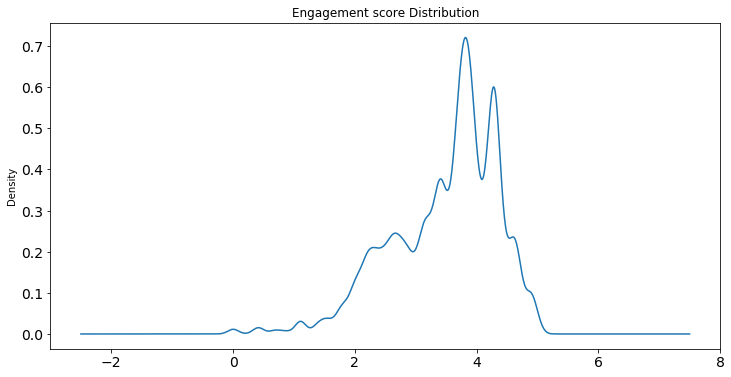

In [14]:
#checking distribution of target variable
_=train[Target_col].plot(kind='density',title='Engagement score Distribution',fontsize=14,figsize=(12,6))

In [15]:
#Checking data distribution in train and test
print('Checking Data distribution for Train! \n')
for col in features:
    print(f'Distinct entries in {col}:{train[col].nunique()}')
    print(f'Distinct entries in {col}:{test[col].nunique()}')
    print(f'common number of {col} entries in test and train:{len(np.intersect1d(train[col].unique(),test[col].unique()))}')

Checking Data distribution for Train! 

Distinct entries in user_id:27734
Distinct entries in user_id:10384
common number of user_id entries in test and train:10384
Distinct entries in category_id:47
Distinct entries in category_id:23
common number of category_id entries in test and train:23
Distinct entries in video_id:175
Distinct entries in video_id:128
common number of video_id entries in test and train:128
Distinct entries in age:58
Distinct entries in age:53
common number of age entries in test and train:53
Distinct entries in gender:2
Distinct entries in gender:2
common number of gender entries in test and train:2
Distinct entries in profession:3
Distinct entries in profession:3
common number of profession entries in test and train:3
Distinct entries in followers:17
Distinct entries in followers:15
common number of followers entries in test and train:15
Distinct entries in views:43
Distinct entries in views:21
common number of views entries in test and train:21


In [15]:
train.describe()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score
count,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000,89197.000000
mean,44599.000000,13881.909806,18.323733,77.715383,24.848616,252.460172,502.980268,3.487797
std,25749.100318,8005.582771,11.675154,48.469656,8.955535,46.094468,268.569482,0.863498
min,1.000000,1.000000,1.000000,1.000000,10.000000,160.000000,30.000000,0.000000
25%,22300.000000,6945.000000,8.000000,34.000000,18.000000,230.000000,229.000000,2.900000
50%,44599.000000,13892.000000,16.000000,76.000000,23.000000,240.000000,467.000000,3.710000
75%,66898.000000,20819.000000,26.000000,120.000000,32.000000,280.000000,714.000000,4.150000
max,89197.000000,27734.000000,47.000000,175.000000,68.000000,360.000000,1000.000000,5.000000


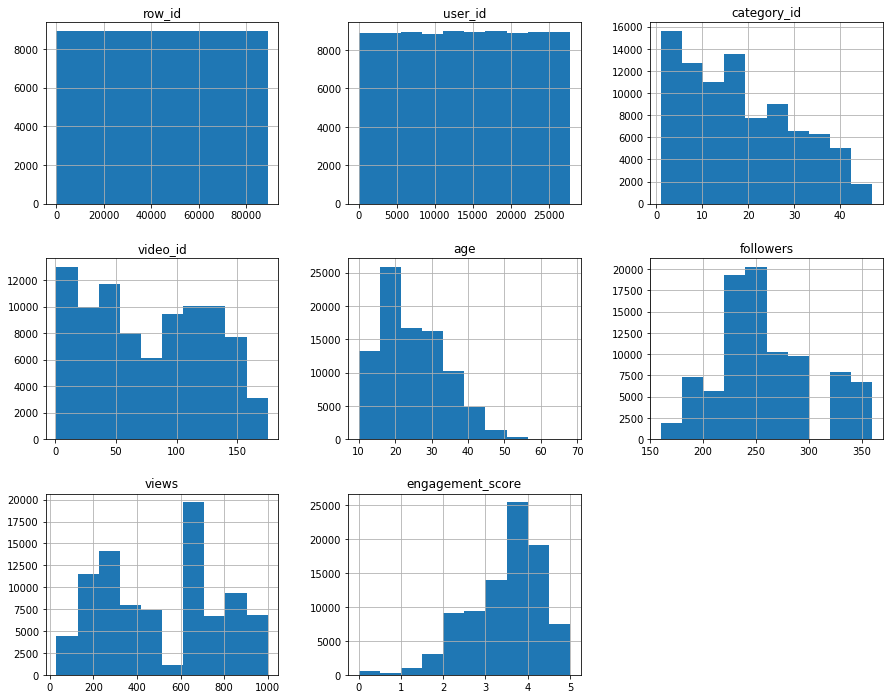

In [16]:
#Checking distribution of numeric columns
train.hist(figsize=(15,12));

    Most of the videos have engagement index between 3 and 4.5. It has left skewed distribution as most videos have engagement score above 2
    Most people are between age 15 to 35
    Most categories have an average followers of 250
    


In [14]:
cat_cols=['gender','profession']
num_cols=[c for c in features if c not in cat_cols]

In [15]:
num_cols

['user_id', 'category_id', 'video_id', 'age', 'followers', 'views']

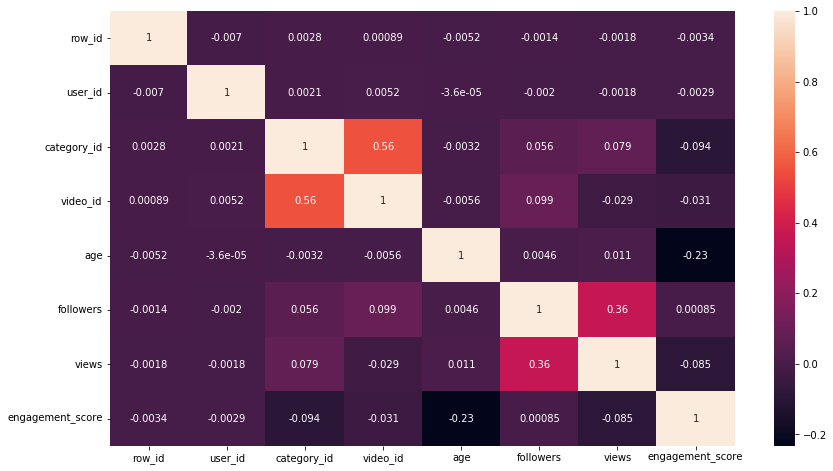

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(train.corr(),annot=True)

From the above heatmap we could infer that category_id and video_id have high correlation so we could drop one. followers and number of views are moderately correlated

In [20]:
#Checking correlation with respect to target col
train.corr()['engagement_score']

row_id             -0.003368
user_id            -0.002900
category_id        -0.094288
video_id           -0.030552
age                -0.232626
followers           0.000855
views              -0.084679
engagement_score    1.000000
Name: engagement_score, dtype: float64

Followers have little positive correlation with engagement score. Age have somewhat strong negative correlation with target. So it might be a useful feature. Other features have little negative correlation

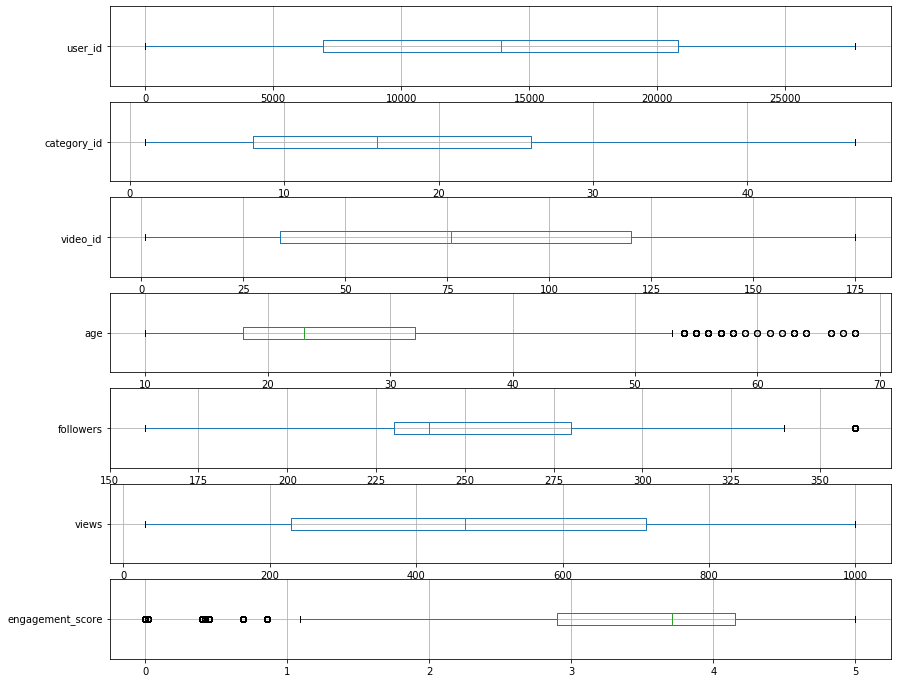

In [21]:
#Lets check boxplot distribution of numerical columns
fig,axes=plt.subplots(7,1,figsize=(14,12))
for i,c in enumerate(num_cols+['engagement_score']):
    _=train[[c]].boxplot(ax=axes[i],vert=False)

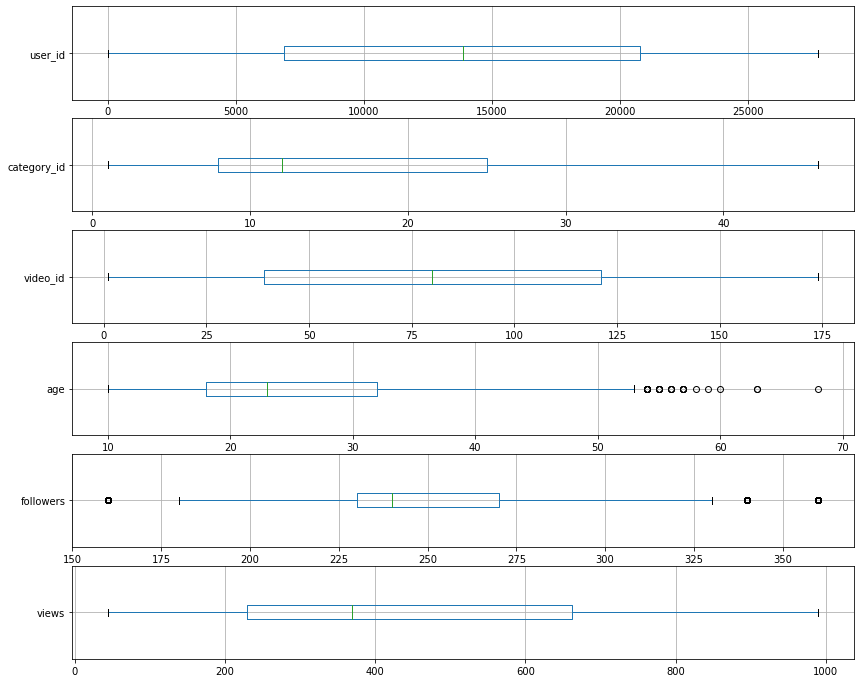

In [22]:
fig,axes=plt.subplots(6,1,figsize=(14,12))
for i,c in enumerate(num_cols):
    _=test[[c]].boxplot(ax=axes[i],vert=False)

In [16]:
train1=train.copy()

In [17]:
import scipy.stats as stat

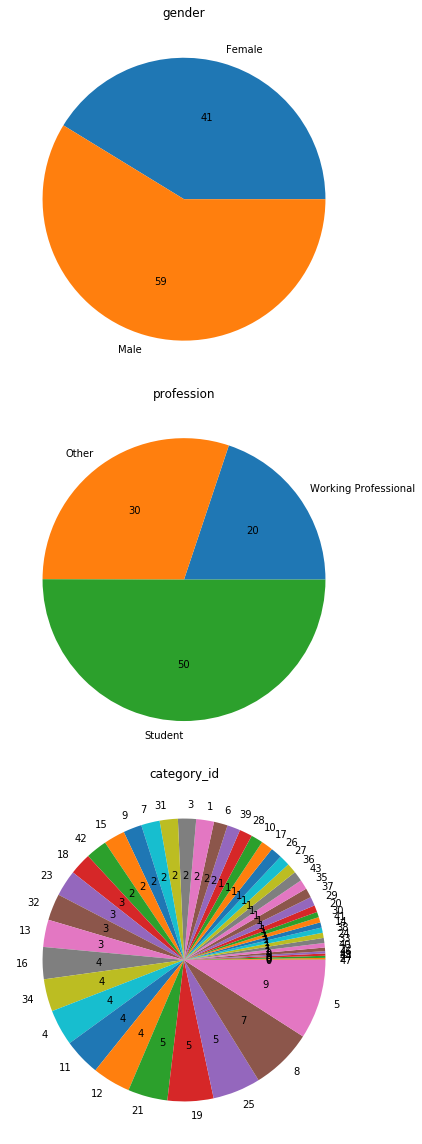

In [25]:
#Pie chart for categorical columns percentage values
fig,axes=plt.subplots(3,1,figsize=(20,16))
for i,c in enumerate(cat_cols+['category_id']):
    _=train1[c].value_counts()[::-1].plot(kind='pie',ax=axes[i],title=c,autopct='%.0f')
    _=axes[i].set_ylabel('')
plt.tight_layout()


Text(0, 0.5, 'Count')

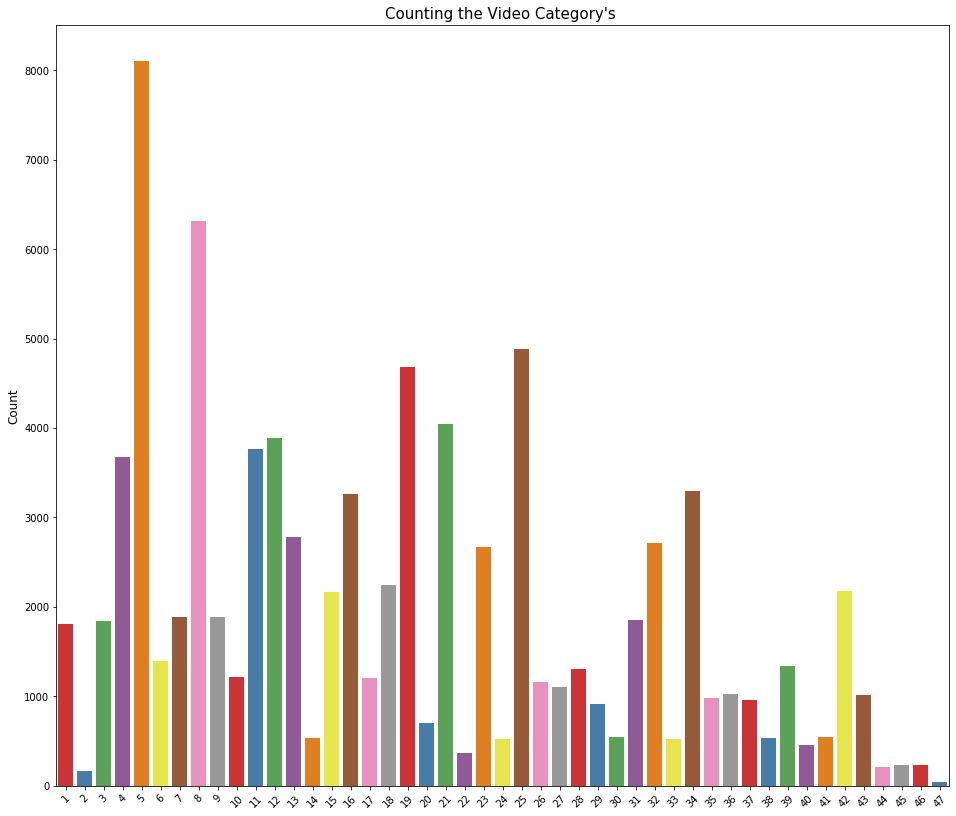

In [26]:
#Countplot for category of videos. Though it is numeric column. It corresponds to some category so we are considering as categorical
plt.figure(figsize=(16,14))
g = sns.countplot('category_id', data=train1, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)


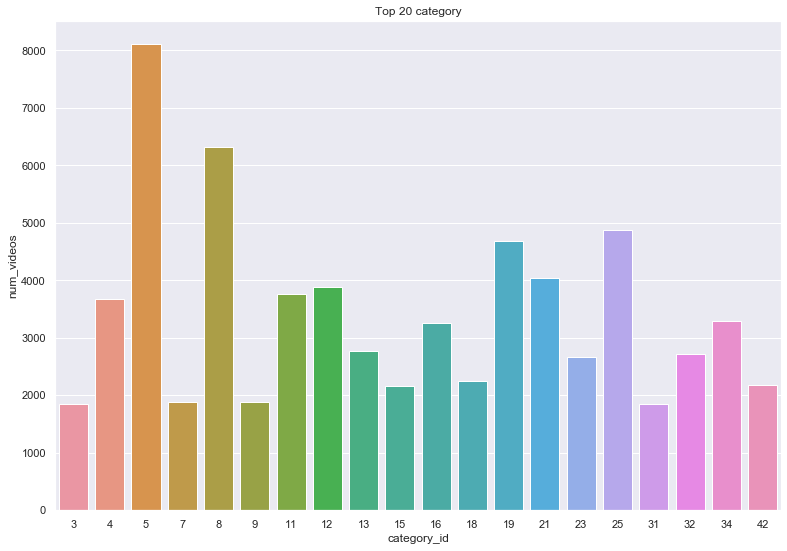

In [27]:
#checking top 20 category
sns.set(rc={'figure.figsize':(13,9)})
top_20_category=train['category_id'].value_counts()[:20].reset_index()
top_20_category.columns=['category_id','num_videos']

_=sns.barplot(data=top_20_category,y='num_videos',x='category_id')
_=plt.title('Top 20 category')

In [18]:
#Onehot encoding for categoricalcolumns
train=pd.get_dummies(train,drop_first=True)

In [19]:
train.head()

,row_id,user_id,category_id,video_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional
0,1,19990,37,128,24,180,1000,4.33,1,1,0
1,2,5304,32,132,14,330,714,1.79,0,1,0
2,3,1840,12,24,19,180,138,4.35,1,1,0
3,4,12597,23,112,19,220,613,3.77,1,1,0
4,5,13626,23,112,27,220,613,3.13,1,0,1


In [20]:
train1.skew()

row_id              0.000000
user_id            -0.003594
category_id         0.484276
video_id            0.079629
age                 0.579960
followers           0.414164
views               0.043662
engagement_score   -0.855630
dtype: float64

In [21]:
#Onehot encoding in test data
test=pd.get_dummies(test,drop_first=True)

In [22]:
test.head()

,row_id,user_id,category_id,video_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional
0,89198,7986,12,42,14,180,138,1,1,0
1,89199,11278,34,115,14,230,840,1,1,0
2,89200,17245,8,110,44,280,628,0,0,1
3,89201,9851,16,137,18,270,462,1,1,0
4,89202,16008,34,96,47,230,840,0,0,0


In [23]:
#Dropping rowid as it is of no use and video id is highly correlated with ctegory and as we are calculatinf engagement scre for user, It didn't provide much insight
train=train.drop(['row_id','video_id'],axis=1)
test=test.drop(['row_id','video_id'],axis=1)


In [24]:
train['train_or_test']='train'
test['train_or_test']='test'
df=pd.concat([train,test])


In [25]:
df.sample(10)

,user_id,category_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional,train_or_test
81096,20210,25,25,240,317,4.06,1,0,0,train
42520,16931,23,20,220,613,3.83,0,1,0,train
4044,25024,16,28,270,462,4.23,0,0,0,train
443,24611,43,37,280,617,4.28,1,0,0,train
25966,9785,29,22,260,52,2.60,1,1,0,train
64518,26947,31,22,230,156,4.73,0,1,0,train
10246,10007,11,39,250,180,3.67,1,0,1,train
57471,17045,27,15,320,309,2.80,0,1,0,train
7443,20091,8,36,280,628,NaN,1,0,0,test
79616,9021,25,18,240,317,3.77,1,1,0,train


In [26]:
#Category engagement
df['categ_enga']=df['views']/df['followers']

In [23]:
#test['categ_enga']=test['views']/test['followers']

In [27]:
df['user_count']=df.groupby('user_id')['category_id'].transform(lambda x: x.count())

In [28]:
#Mean users in category
df['user_meancat']=df.groupby('category_id')['user_count'].transform(lambda x: x.mean())

In [364]:
#Max users in category
#df['user_maxcat']=df.groupby('category_id')['user_count'].transform(lambda x: x.max())

In [506]:
#test['user_count']=test.groupby('user_id')['category_id'].transform(lambda x: x.count())

In [611]:
#from category_encoders import TargetEncoder,MEstimateEncoder

In [612]:
#encoder=MEstimateEncoder()

In [613]:
#encoder.fit(train['engagement_score'],train['user_id'])

MEstimateEncoder(cols=[])

In [614]:
#train['user_encoded'] = encoder.transform(train['user_id'], train['engagement_score'])
#test['user_encoded'] = encoder.transform(test['user_id'])

In [153]:
df1=df.copy()

In [86]:
#f['user_id_mean_caten'] = df.groupby('user_id')['categ_enga'].transform(lambda x: x.mean())
#df['user_id_mean_views'] = df.groupby('user_id')['views'].transform('mean')
#df['user_id_min_views'] = df.groupby('user_id')['views'].transform('min')


In [231]:
#df['user_id_mean_views'] = df.groupby('user_id')['views'].transform('mean')

In [30]:
train=df.loc[df.train_or_test.isin(['train'])]
test=df.loc[df.train_or_test.isin(['test'])]


In [31]:
train.shape,test.shape

((89197, 13), (11121, 13))

In [32]:
train.sample(5)

,user_id,category_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional,train_or_test,categ_enga,user_count,user_meancat
78484,12676,8,28,280,628,3.69,1,0,1,train,2.242857,2,4.303200
4880,10380,42,34,290,689,2.30,1,0,0,train,2.375862,2,3.552030
60341,17184,10,32,210,44,2.71,1,0,0,train,0.209524,3,3.367903
21562,17867,4,39,230,781,3.91,1,0,0,train,3.395652,2,3.813959
9903,16340,33,10,270,862,3.80,0,1,0,train,3.192593,3,4.261122


In [337]:
df[df['user_id']==22219]

,user_id,category_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional,train_or_test,categ_enga,user_count,user_meancat
9626,22219,16,33,270,462,1.96,0,0,1,train,1.711111,7,4.959173
26379,22219,16,33,270,462,1.55,0,0,1,train,1.711111,7,4.959173
46632,22219,34,33,230,840,2.16,0,0,1,train,3.652174,7,4.978387
49577,22219,34,33,230,840,2.06,0,0,1,train,3.652174,7,4.978387
83847,22219,39,33,270,89,3.29,0,0,1,train,0.329630,7,4.380881
4207,22219,34,33,230,840,NaN,0,0,1,test,3.652174,7,4.978387
10930,22219,16,33,270,462,NaN,0,0,1,test,1.711111,7,4.959173


In [322]:
test[test['user_id']==22219]

,user_id,category_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional,categ_enga,user_count
4207,22219,34,33,230,840,0,0,1,3.652174,7
10930,22219,16,33,270,462,0,0,1,1.711111,7


In [29]:
test.sample(5)

,user_id,category_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional,train_or_test,categ_enga,user_count,user_meancat
4369,20497,4,43,230,781,NaN,0,0,1,test,3.395652,5,3.813959
4278,1786,4,15,230,781,NaN,1,1,0,test,3.395652,5,3.813959
2931,20620,8,27,280,628,NaN,1,1,0,test,2.242857,5,4.303200
8474,345,11,30,250,180,NaN,1,0,1,test,0.720000,8,4.744937
6584,6659,25,33,240,317,NaN,0,0,0,test,1.320833,3,3.860640


In [33]:
#Dropped followers and category_id
train=train.drop(['train_or_test'],axis=1)
test=test.drop(['train_or_test'],axis=1)

In [91]:
#Dropped followers and category_id
#train=train.drop(['views','category_id'],axis=1)
#test=test.drop(['views','category_id'],axis=1)

In [34]:
train.head()

,user_id,category_id,age,followers,views,engagement_score,gender_Male,profession_Student,profession_Working Professional,categ_enga,user_count,user_meancat
0,19990,37,24,180,1000,4.33,1,1,0,5.555556,3,3.428274
1,5304,32,14,330,714,1.79,0,1,0,2.163636,5,4.743385
2,1840,12,19,180,138,4.35,1,1,0,0.766667,4,2.703083
3,12597,23,19,220,613,3.77,1,1,0,2.786364,3,3.199925
4,13626,23,27,220,613,3.13,1,0,1,2.786364,4,3.199925


In [35]:
test=test.drop('engagement_score',axis=1)

In [36]:
test.head()

,user_id,category_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional,categ_enga,user_count,user_meancat
0,7986,12,14,180,138,1,1,0,0.766667,3,2.703083
1,11278,34,14,230,840,1,1,0,3.652174,7,4.978387
2,17245,8,44,280,628,0,0,1,2.242857,6,4.303200
3,9851,16,18,270,462,1,1,0,1.711111,4,4.959173
4,16008,34,47,230,840,0,0,0,3.652174,4,4.978387


In [135]:
#Calculate median age and converting age to separate df so easy to find percentile
#Age_col_df = pd.DataFrame(train['age'])
#Age_median = Age_col_df.median()

#getting IQR of age column
#Q3=Age_col_df.quantile(q=.75)
#Q1=Age_col_df.quantile(q=.25)


In [136]:
#Deriving boundaries of Outliers
#IQR=Q3-Q1

#IQR_LL=int(Q1-1.5*IQR)
#IQR_UL=int(Q3+1.5*IQR)


In [138]:
#IQR_LL,IQR_UL

(-3, 53)

In [140]:
#Finding and treating outliers both upper and lower end
#train.loc[train['age']>IQR_UL,'age']=int(Age_col_df.quantile(q=0.997))
#train.loc[train['age']<IQR_LL,'age']=int(Age_col_df.quantile(q=0.01))

In [141]:
#Finding and treating outliers both upper and lower end
#test.loc[test['age']>IQR_UL,'age']=int(Age_tst_df.quantile(q=0.997))
#test.loc[test['age']<IQR_LL,'age']=int(Age_tst_df.quantile(q=0.01))

In [37]:
X=train.drop('engagement_score',axis=1)
y=train['engagement_score']

In [38]:
X.head()

,user_id,category_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional,categ_enga,user_count,user_meancat
0,19990,37,24,180,1000,1,1,0,5.555556,3,3.428274
1,5304,32,14,330,714,0,1,0,2.163636,5,4.743385
2,1840,12,19,180,138,1,1,0,0.766667,4,2.703083
3,12597,23,19,220,613,1,1,0,2.786364,3,3.199925
4,13626,23,27,220,613,1,0,1,2.786364,4,3.199925


In [39]:
test.head()

,user_id,category_id,age,followers,views,gender_Male,profession_Student,profession_Working Professional,categ_enga,user_count,user_meancat
0,7986,12,14,180,138,1,1,0,0.766667,3,2.703083
1,11278,34,14,230,840,1,1,0,3.652174,7,4.978387
2,17245,8,44,280,628,0,0,1,2.242857,6,4.303200
3,9851,16,18,270,462,1,1,0,1.711111,4,4.959173
4,16008,34,47,230,840,0,0,0,3.652174,4,4.978387


In [40]:
#Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
scaler=StandardScaler()

In [42]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [43]:
#defining a function to find model score,r2 score for the given dataset
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),XGBRegressor(),LGBMRegressor(),CatBoostRegressor()]



In [54]:
for m in model:
    m.fit(scaled_X_train,y_train)
    print(m)
    predm=m.predict(scaled_X_test)
    print('MAE:',mean_absolute_error(y_test,predm))
    print('MSE:',mean_squared_error(y_test,predm))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2 score:',r2_score(y_test,predm))
    print('*'*100)
    print('\n')       

LinearRegression()
MAE: 0.5684849713417575
MSE: 0.5427643601368746
RMSE: 0.7367254306299428
R2 score: 0.27794401662132173
****************************************************************************************************


DecisionTreeRegressor()
MAE: 0.5375907285809193
MSE: 0.6274421111616219
RMSE: 0.7921124359342061
R2 score: 0.16529462164068964
****************************************************************************************************


KNeighborsRegressor()
MAE: 0.5409055306427505
MSE: 0.5254589730941706
RMSE: 0.7248854896424473
R2 score: 0.300965900843265
****************************************************************************************************


RandomForestRegressor()
MAE: 0.46797650966916604
MSE: 0.4207093140411389
RMSE: 0.6486210866454613
R2 score: 0.4403175672958014
****************************************************************************************************


AdaBoostRegressor()
MAE: 0.63402263280169
MSE: 0.6026688885383669
RMSE: 0.776317517861323

120:	learn: 0.6890953	total: 1.4s	remaining: 10.2s
121:	learn: 0.6890371	total: 1.41s	remaining: 10.1s
122:	learn: 0.6889906	total: 1.42s	remaining: 10.1s
123:	learn: 0.6889526	total: 1.42s	remaining: 10s
124:	learn: 0.6888992	total: 1.43s	remaining: 10s
125:	learn: 0.6888417	total: 1.43s	remaining: 9.94s
126:	learn: 0.6887394	total: 1.44s	remaining: 9.91s
127:	learn: 0.6886534	total: 1.45s	remaining: 9.89s
128:	learn: 0.6885733	total: 1.46s	remaining: 9.88s
129:	learn: 0.6884985	total: 1.47s	remaining: 9.85s
130:	learn: 0.6884467	total: 1.48s	remaining: 9.84s
131:	learn: 0.6883719	total: 1.49s	remaining: 9.82s
132:	learn: 0.6883107	total: 1.5s	remaining: 9.81s
133:	learn: 0.6882579	total: 1.51s	remaining: 9.79s
134:	learn: 0.6881778	total: 1.52s	remaining: 9.78s
135:	learn: 0.6880917	total: 1.53s	remaining: 9.76s
136:	learn: 0.6880393	total: 1.54s	remaining: 9.73s
137:	learn: 0.6880102	total: 1.55s	remaining: 9.71s
138:	learn: 0.6879448	total: 1.56s	remaining: 9.7s
139:	learn: 0.68784

292:	learn: 0.6791439	total: 3s	remaining: 7.23s
293:	learn: 0.6790704	total: 3s	remaining: 7.21s
294:	learn: 0.6790187	total: 3.01s	remaining: 7.19s
295:	learn: 0.6789631	total: 3.02s	remaining: 7.17s
296:	learn: 0.6789326	total: 3.02s	remaining: 7.15s
297:	learn: 0.6789164	total: 3.03s	remaining: 7.14s
298:	learn: 0.6788623	total: 3.04s	remaining: 7.13s
299:	learn: 0.6788181	total: 3.05s	remaining: 7.12s
300:	learn: 0.6787825	total: 3.06s	remaining: 7.1s
301:	learn: 0.6787218	total: 3.07s	remaining: 7.09s
302:	learn: 0.6786728	total: 3.08s	remaining: 7.07s
303:	learn: 0.6785998	total: 3.08s	remaining: 7.05s
304:	learn: 0.6785131	total: 3.09s	remaining: 7.04s
305:	learn: 0.6784565	total: 3.1s	remaining: 7.03s
306:	learn: 0.6784100	total: 3.11s	remaining: 7.02s
307:	learn: 0.6783723	total: 3.12s	remaining: 7.01s
308:	learn: 0.6783185	total: 3.13s	remaining: 7s
309:	learn: 0.6782494	total: 3.14s	remaining: 6.99s
310:	learn: 0.6781967	total: 3.15s	remaining: 6.98s
311:	learn: 0.6781461	t

463:	learn: 0.6717927	total: 4.57s	remaining: 5.28s
464:	learn: 0.6717369	total: 4.58s	remaining: 5.27s
465:	learn: 0.6716919	total: 4.59s	remaining: 5.26s
466:	learn: 0.6716613	total: 4.59s	remaining: 5.25s
467:	learn: 0.6716303	total: 4.6s	remaining: 5.23s
468:	learn: 0.6715923	total: 4.61s	remaining: 5.22s
469:	learn: 0.6715532	total: 4.62s	remaining: 5.21s
470:	learn: 0.6714993	total: 4.63s	remaining: 5.21s
471:	learn: 0.6714770	total: 4.64s	remaining: 5.2s
472:	learn: 0.6714451	total: 4.65s	remaining: 5.19s
473:	learn: 0.6714005	total: 4.66s	remaining: 5.18s
474:	learn: 0.6713588	total: 4.67s	remaining: 5.17s
475:	learn: 0.6713367	total: 4.68s	remaining: 5.16s
476:	learn: 0.6713054	total: 4.69s	remaining: 5.15s
477:	learn: 0.6712645	total: 4.7s	remaining: 5.14s
478:	learn: 0.6712141	total: 4.71s	remaining: 5.13s
479:	learn: 0.6711718	total: 4.72s	remaining: 5.12s
480:	learn: 0.6711219	total: 4.74s	remaining: 5.11s
481:	learn: 0.6710947	total: 4.75s	remaining: 5.1s
482:	learn: 0.67

637:	learn: 0.6653360	total: 6.15s	remaining: 3.49s
638:	learn: 0.6652989	total: 6.16s	remaining: 3.48s
639:	learn: 0.6652676	total: 6.17s	remaining: 3.47s
640:	learn: 0.6652387	total: 6.17s	remaining: 3.46s
641:	learn: 0.6652074	total: 6.18s	remaining: 3.45s
642:	learn: 0.6651736	total: 6.19s	remaining: 3.44s
643:	learn: 0.6651388	total: 6.19s	remaining: 3.42s
644:	learn: 0.6651279	total: 6.2s	remaining: 3.41s
645:	learn: 0.6650986	total: 6.21s	remaining: 3.4s
646:	learn: 0.6650755	total: 6.22s	remaining: 3.39s
647:	learn: 0.6650480	total: 6.23s	remaining: 3.38s
648:	learn: 0.6650179	total: 6.24s	remaining: 3.37s
649:	learn: 0.6649806	total: 6.25s	remaining: 3.36s
650:	learn: 0.6649452	total: 6.26s	remaining: 3.35s
651:	learn: 0.6649045	total: 6.26s	remaining: 3.34s
652:	learn: 0.6648710	total: 6.27s	remaining: 3.33s
653:	learn: 0.6648431	total: 6.28s	remaining: 3.32s
654:	learn: 0.6648143	total: 6.29s	remaining: 3.31s
655:	learn: 0.6647807	total: 6.3s	remaining: 3.3s
656:	learn: 0.66

802:	learn: 0.6599809	total: 7.54s	remaining: 1.85s
803:	learn: 0.6599556	total: 7.54s	remaining: 1.84s
804:	learn: 0.6599248	total: 7.55s	remaining: 1.83s
805:	learn: 0.6598712	total: 7.55s	remaining: 1.82s
806:	learn: 0.6598141	total: 7.56s	remaining: 1.81s
807:	learn: 0.6597954	total: 7.57s	remaining: 1.8s
808:	learn: 0.6597748	total: 7.58s	remaining: 1.79s
809:	learn: 0.6597431	total: 7.59s	remaining: 1.78s
810:	learn: 0.6597018	total: 7.6s	remaining: 1.77s
811:	learn: 0.6596598	total: 7.61s	remaining: 1.76s
812:	learn: 0.6596188	total: 7.62s	remaining: 1.75s
813:	learn: 0.6595861	total: 7.63s	remaining: 1.74s
814:	learn: 0.6595573	total: 7.64s	remaining: 1.74s
815:	learn: 0.6595351	total: 7.66s	remaining: 1.73s
816:	learn: 0.6595068	total: 7.67s	remaining: 1.72s
817:	learn: 0.6594785	total: 7.68s	remaining: 1.71s
818:	learn: 0.6594570	total: 7.69s	remaining: 1.7s
819:	learn: 0.6594301	total: 7.7s	remaining: 1.69s
820:	learn: 0.6593989	total: 7.71s	remaining: 1.68s
821:	learn: 0.65

977:	learn: 0.6546812	total: 8.93s	remaining: 201ms
978:	learn: 0.6546540	total: 8.94s	remaining: 192ms
979:	learn: 0.6546282	total: 8.94s	remaining: 183ms
980:	learn: 0.6546074	total: 8.95s	remaining: 173ms
981:	learn: 0.6545838	total: 8.96s	remaining: 164ms
982:	learn: 0.6545701	total: 8.96s	remaining: 155ms
983:	learn: 0.6545263	total: 8.97s	remaining: 146ms
984:	learn: 0.6544962	total: 8.98s	remaining: 137ms
985:	learn: 0.6544748	total: 8.98s	remaining: 128ms
986:	learn: 0.6544581	total: 8.99s	remaining: 118ms
987:	learn: 0.6544109	total: 9s	remaining: 109ms
988:	learn: 0.6543506	total: 9.01s	remaining: 100ms
989:	learn: 0.6543163	total: 9.02s	remaining: 91.1ms
990:	learn: 0.6542791	total: 9.03s	remaining: 82ms
991:	learn: 0.6542451	total: 9.03s	remaining: 72.9ms
992:	learn: 0.6541966	total: 9.04s	remaining: 63.8ms
993:	learn: 0.6541414	total: 9.05s	remaining: 54.7ms
994:	learn: 0.6540989	total: 9.06s	remaining: 45.5ms
995:	learn: 0.6540570	total: 9.07s	remaining: 36.4ms
996:	learn

In [44]:
rf=RandomForestRegressor()

In [45]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [46]:
rf_pred=rf.predict(X_test)

In [47]:
r2_score(y_test,rf_pred)

0.4371292548160385

In [47]:
test1=test.copy()

In [48]:
scaled_test=scaler.transform(test)

In [234]:
rff_pred=rf.predict(test)

In [235]:
rff_pred

array([4.17017357, 3.92581357, 2.41753333, ..., 3.13221667, 3.48802   ,
       3.36462   ])

In [112]:
submit.head()

,row_id,engagement_score
0,89198,5.0
1,89199,5.0
2,89200,5.0
3,89201,5.0
4,89202,5.0


In [113]:
submit['engagement_score']=rff_pred

In [114]:
submit.to_csv('rf3_base.csv',index=False)

In [51]:
scores=cross_val_score(rf,scaled_X_train,y_train, scoring='r2',cv=5)

In [52]:
scores

array([0.35680625, 0.36639788, 0.37772066, 0.37634805, 0.36524584])

In [50]:
rf.feature_importances_

array([0.3380774 , 0.03221221, 0.1468606 , 0.02398263, 0.02404259,
       0.17624015, 0.087925  , 0.01227527, 0.03934695, 0.07597471,
       0.04306248])

In [48]:
importances=rf.feature_importances_

In [49]:
importances

array([0.33798054, 0.03162765, 0.14699165, 0.02442916, 0.02368653,
       0.17532489, 0.08810798, 0.01218805, 0.03937769, 0.07667212,
       0.04361374])

In [50]:
indices = np.argsort(importances)

In [51]:
X.columns

Index(['user_id', 'category_id', 'age', 'followers', 'views', 'gender_Male',
       'profession_Student', 'profession_Working Professional', 'categ_enga',
       'user_count', 'user_meancat'],
      dtype='object')

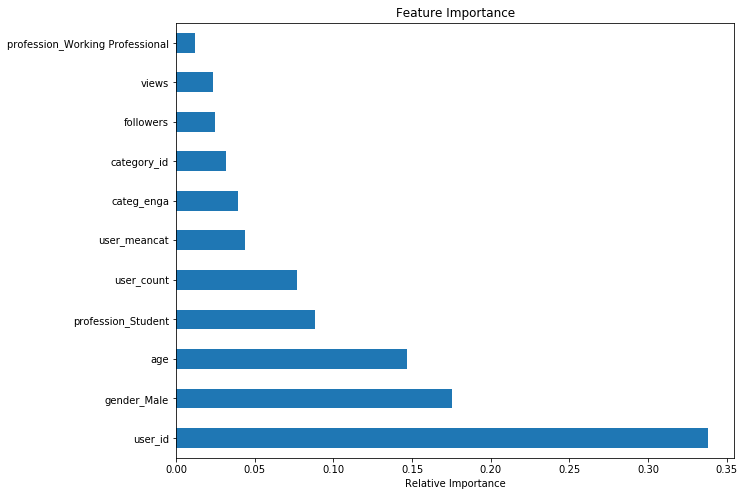

In [52]:
plt.figure(figsize=(10,8))
plt.title('Feature Importance')
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(14).plot(kind='barh')
plt.xlabel('Relative Importance')

plt.show()

In [363]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [196]:
from sklearn.model_selection import RandomizedSearchCV

In [572]:
random_grid = {
               'max_depth': [10, 15,20,27,30,None],
               'min_samples_leaf': [1,2,3],
               'min_samples_split': [1,2,3,5, 10],
               'n_estimators': [100,150,200,250,300]}


In [580]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid,n_iter=100,random_state=42, cv = 3, verbose=1,  n_jobs = -1,scoring="r2")

In [581]:
rf_random.fit(scaled_X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 15, 20, 27, 30, None],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [1, 2, 3, 5, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='r2', verbose=1)

In [582]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 27}

In [67]:
rf_rand = RandomForestRegressor(max_depth=27,min_samples_split=2,min_samples_leaf=1,n_estimators=400,bootstrap=True,n_jobs=-1)

In [59]:
rfrand1=RandomForestRegressor(n_estimators=400,n_jobs=-1)

In [60]:
rf_rand.fit(scaled_X_train,y_train)

RandomForestRegressor(max_depth=29, n_estimators=400, n_jobs=-1)

In [61]:
rand_pred=rf_rand.predict(scaled_X_test)

In [62]:
r2_score(y_test,rand_pred)

0.4428191450617931

In [140]:
xgb=XGBRegressor()

In [141]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [142]:
xgpred=xgb.predict(X_test)

In [143]:
r2_score(y_test,xgpred)

0.3857741282168189

In [140]:
xgb_pred=xgb.predict(test)

In [141]:
submit['engagement_score']=xgb_pred

In [142]:
submit.head()

,row_id,engagement_score
0,89198,4.143600
1,89199,3.656158
2,89200,2.699697
3,89201,3.799146
4,89202,2.877065


In [143]:
submit.to_csv('xgb_base.csv',index=False)

In [63]:
features = [c for c in X.columns if c not in [ID_col, Target_col]]

In [64]:
features

['user_id',
 'category_id',
 'age',
 'followers',
 'views',
 'gender_Male',
 'profession_Student',
 'profession_Working Professional',
 'categ_enga',
 'user_count',
 'user_meancat']

In [266]:
cols=['user_id',
 'category_id',
 'age',
 'followers',
 'views',
 'gender_Male',
 'profession_Student',
 'profession_Working Professional',
 'categ_enga',
 'user_count'
     ]

In [65]:
def run_clf_kfold(clf,train,test,features):
    N_SPLITS=5
    oofs=np.zeros(len(train))
    preds=np.zeros(len(test))
    
    target=train[Target_col]
    
    folds=StratifiedKFold(n_splits=N_SPLITS)
    stratified_target=pd.qcut(train[Target_col],10,labels=False,duplicates='drop')
    
    feature_importances=pd.DataFrame()

    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f'--------------Fold{fold_+1}-------------------')
        #Get train,validation and test sets along with target
        #Training set
        X_trn,y_trn=train[features].iloc[trn_idx],target.iloc[trn_idx]
        #validation set
        X_val,y_val=train[features].iloc[val_idx],target.iloc[val_idx]
        
        ##Test set
        X_test=test[features]
        
        #Scaling data
        scaler=StandardScaler()
        _=scaler.fit(X_trn)
        
        X_trn=scaler.transform(X_trn)
        X_val=scaler.transform(X_val)
        X_test=scaler.transform(X_test)
        
      ## Fitting and predicting
        _=clf.fit(X_trn,y_trn)
        
        fold_importance=pd.DataFrame({'fold':fold_+1,'feature':features,'importance':clf.feature_importances_})
        
        feature_importances=pd.concat([feature_importances,fold_importance],axis=0)
        
        
        preds_val=clf.predict(X_val)
        preds_test=clf.predict(X_test)
        
        fold_score = r2_score(y_val,preds_val)
        print(f'\n R2 score for validation set is {fold_score}')
        
        oofs[val_idx]=preds_val
        preds+=preds_test/N_SPLITS
        
    oofs_score=r2_score(target,oofs)
    print(f'\n\n R2 score for oofs is {oofs_score}')
    
    feature_importances=feature_importances.reset_index(drop=True)
    fi=feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]
    fi.plot(kind='barh',figsize=(14,8))
           
    return oofs,preds,fi

--------------Fold1-------------------

 R2 score for validation set is 0.4604366598086511
--------------Fold2-------------------

 R2 score for validation set is 0.45782197413784786
--------------Fold3-------------------

 R2 score for validation set is 0.46332102352375404
--------------Fold4-------------------

 R2 score for validation set is 0.467052220826205
--------------Fold5-------------------

 R2 score for validation set is 0.45555704495027605


 R2 score for oofs is 0.46085152021146547


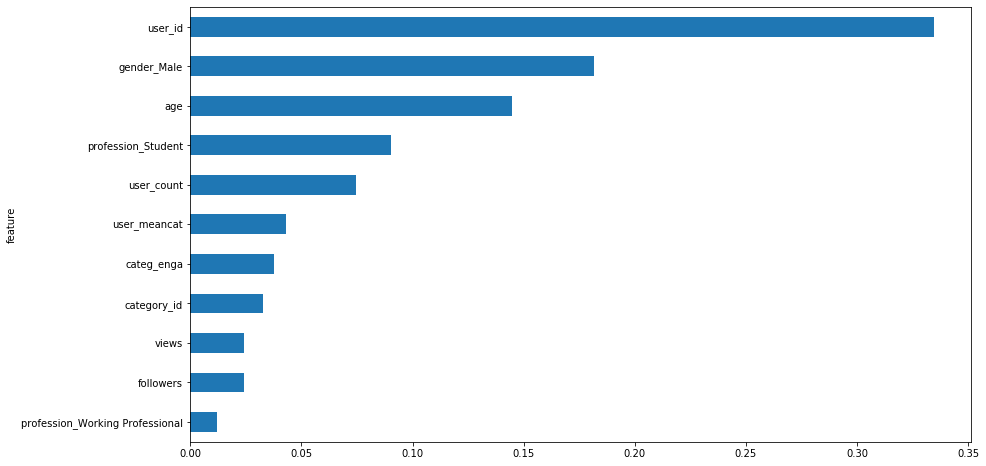

In [68]:
dt_oofs,dt_preds,fi=run_clf_kfold(rf_rand,train,test,features)

In [69]:
submit['engagement_score']=dt_preds

In [70]:
submit.to_csv('rf_kfoldt.csv',index=False)

#### Stratified KFold function for Boosting algorithms

In [154]:
def run_gradient_boosting(clf,fit_params,train,test,features):
    N_SPLITS=5
    oofs=np.zeros(len(train))
    preds=np.zeros(len(test))
    
    target=train[Target_col]
    
    folds=StratifiedKFold(n_splits=N_SPLITS)
    stratified_target=pd.qcut(train[Target_col],10,labels=False,duplicates='drop')
    
    feature_importances=pd.DataFrame()
    
    for fold_,(trn_idx,val_idx) in enumerate(folds.split(train,stratified_target)):
        print(f'\n -----------------Fold{fold_+1}-----------------')
        
        #Training set
        X_trn,y_trn=train[features].iloc[trn_idx],target.iloc[trn_idx]
        
        #Validation set
        X_val,y_val=train[features].iloc[val_idx],target.iloc[val_idx]
        
        ##Test set
        X_test=test[features]
        
        scaler=StandardScaler()
        _=scaler.fit(X_trn)
        
        X_trn = scaler.transform(X_trn)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        _=clf.fit(X_trn,y_trn,eval_set=[(X_val,y_val)],**fit_params)
        
        fold_importance=pd.DataFrame({'fold':fold_+1,'feature':features,'importance':clf.feature_importances_})
        
        feature_importances=pd.concat([feature_importances,fold_importance],axis=0)
        
        preds_val=clf.predict(X_val)
        preds_test=clf.predict(X_test)
        
        fold_score=r2_score(y_val,preds_val)
        print(f'\nR2 score for validation set is {fold_score}')
        
        oofs[val_idx]=preds_val
        preds+=preds_test/N_SPLITS
        
    oofs_score=r2_score(target,oofs)
    print(f'\n\nR2 score for oofs is {oofs_score}')
    
    feature_importances=feature_importances.reset_index(drop=True)
    fi=feature_importances.groupby('feature')['importance'].mean().sort_values(ascending=False)[:20][::-1]
    fi.plot(kind='barh',figsize=(14,8))
    
    return oofs,preds,fi
    
        
        

In [159]:
xgbreg = XGBRegressor(booster= 'gbtree',
                        colsample_bytree= 0.7,
                        eta= 0.03,
                        learning_rate= 0.05,
                        max_depth= 10,
                        min_child_weight= 6,
                        n_estimators= 1000,
                        n_jobs= -1,
                        objective = 'reg:squarederror',
                        subsample= 0.5,
                        verbosity= 1)


 -----------------Fold1-----------------
[0]	validation_0-rmse:2.96317
[200]	validation_0-rmse:0.66065
[400]	validation_0-rmse:0.65001
[600]	validation_0-rmse:0.64377
[800]	validation_0-rmse:0.64022
[999]	validation_0-rmse:0.63795

R2 score for validation set is 0.4516280151597436

 -----------------Fold2-----------------
[0]	validation_0-rmse:2.96265
[200]	validation_0-rmse:0.66398
[400]	validation_0-rmse:0.65355
[600]	validation_0-rmse:0.64675
[800]	validation_0-rmse:0.64331
[999]	validation_0-rmse:0.64126

R2 score for validation set is 0.44581740641940104

 -----------------Fold3-----------------
[0]	validation_0-rmse:2.96380
[200]	validation_0-rmse:0.66007
[400]	validation_0-rmse:0.65001
[600]	validation_0-rmse:0.64302
[800]	validation_0-rmse:0.63904
[999]	validation_0-rmse:0.63687

R2 score for validation set is 0.44813031149218274

 -----------------Fold4-----------------
[0]	validation_0-rmse:2.96172
[200]	validation_0-rmse:0.66989
[400]	validation_0-rmse:0.65717
[600]	validat

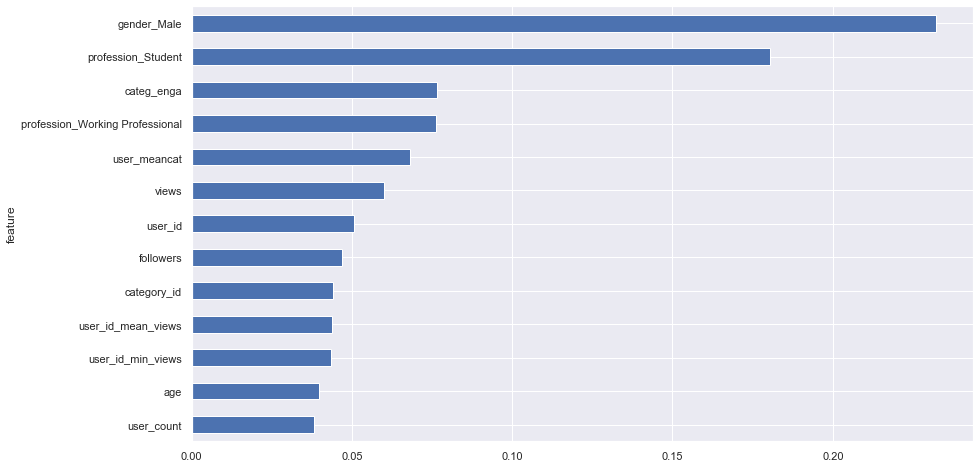

In [156]:
xgb_oofs, xgb_preds, fi = run_gradient_boosting(xgbreg, fit_params, train, test, features)

##### We got better R2 score with Random forest model so lets have that as our final submission